<font size=6><b>[Project]경기국면에 따른 포트폴리오 리밸런싱(Fama French) </b></font>

* <b> Market Premium - Calculated from S&P/TSX Composite Index and 90-day Treasury Bills.
* <b> SMB - Categorized each security as small or large market cap by using 30-70 percentiles of aggregate market cap in portfolio.
* <b> HML - Used inverse of P/B as proxy to catergorize and calculate book to market value.

In [ ]:
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff

# Data Load

In [ ]:
datasets = ff.get_available_datasets( )
print( 'No. of datasets:{0}'.format( len( datasets ) ) )

No. of datasets:297


In [ ]:
datasets #[:10]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

## 10개 산업별 포트폴리오

In [ ]:
df_10_industry = [ dataset for dataset in datasets if '10' in dataset and 'Industry' in dataset ]
df_10_industry

['10_Industry_Portfolios',
 '10_Industry_Portfolios_Wout_Div',
 '10_Industry_Portfolios_daily']

In [ ]:
ds_industry = web.DataReader( df_10_industry[ 0 ], 'famafrench', start='2017-06-23', end='2019-11-01' )
print( type( ds_industry ) )

<class 'dict'>


In [ ]:
ds_industry.keys( )

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 'DESCR'])

In [ ]:
print( ds_industry[ 'DESCR'])

10 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 202209 CRSP database. It contains value- and equal-weighted returns for 10 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (30 rows x 10 cols)
  1 : Average Equal Weighted Returns -- Monthly (30 rows x 10 cols)
  2 : Average Value Weighted Returns -- Annual (3 rows x 10 cols)
  3 : Average Equal Weighted Returns -- Annual (3 rows x 10 cols)
  4 : Number of Firms in Portfolios (30 rows x 10 cols)
  5 : Average Firm Size (30 rows x 10 cols)
  6 : Sum of BE / Sum of ME (3 rows x 10 cols)
  7 : Value-Weighted Average of BE/ME (3 rows x 10 cols)


In [ ]:
ds_industry[ 0 ].head( )

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2017-06,-1.03,3.51,1.28,-0.08,-2.10,-2.22,-1.90,5.54,-1.89,4.22
2017-07,-0.13,-1.17,2.18,2.07,3.74,5.27,0.12,0.70,2.98,1.49
2017-08,-1.73,-0.10,0.27,-5.09,3.08,-2.64,-1.67,2.58,2.20,-0.38
2017-09,-0.33,5.28,4.17,10.95,0.65,-1.67,2.43,2.05,-1.97,4.36
2017-10,0.09,1.25,2.80,0.49,6.88,-5.68,2.72,-2.27,3.07,2.08


## 5팩터 포트폴리오

In [ ]:
df_5_factor = [ dataset for dataset in datasets if '5' in dataset and 'Factor' in dataset ]
df_5_factor

['F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Developed_5_Factors',
 'Developed_5_Factors_Daily',
 'Developed_ex_US_5_Factors',
 'Developed_ex_US_5_Factors_Daily',
 'Europe_5_Factors',
 'Europe_5_Factors_Daily',
 'Japan_5_Factors',
 'Japan_5_Factors_Daily',
 'Asia_Pacific_ex_Japan_5_Factors',
 'Asia_Pacific_ex_Japan_5_Factors_Daily',
 'North_America_5_Factors',
 'North_America_5_Factors_Daily',
 'Emerging_5_Factors']

In [ ]:
ds_factors = web.DataReader( df_5_factor[ 0 ], 'famafrench', start='2017-06-23', end='2019-11-01' )
print( '\nKEYS\n{0}'.format( ds_factors.keys( ) ) )


KEYS
dict_keys([0, 1, 'DESCR'])


In [ ]:
ds_factors[ 0 ].head( )

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2017-06,0.78,2.57,1.48,-2.25,0.01,0.06
2017-07,1.87,-1.66,-0.24,-0.69,-0.12,0.07
2017-08,0.16,-1.82,-2.09,0.15,-2.37,0.09
2017-09,2.51,4.77,3.12,-1.46,1.68,0.09
2017-10,2.25,-1.93,0.21,0.92,-3.24,0.09


# F-F3 vs. 펀드수익률 회귀분석
* 월간 F-F3(Mkt-RF, SMB, HML)과 펀드(FCNTX:Fidelity Contrafund Fund) 수익률 간 회귀분석

## F-F3 Data Load

In [ ]:
import pandas_datareader.data as web 
import pandas_datareader.famafrench as ff 
import pandas as pd 

#F-F_Research_Data_Factors ----------------- 0:월간 1:년간
datasets = ff.get_available_datasets( ) 
df_3_factor = datasets[ 0 ] 

ds_factors = web.DataReader( df_3_factor,'famafrench', start='1980-02-01', end='2022-10-31' ) 
print( ds_factors ) 

ds_factors[ 0 ].index = ds_factors[ 0 ].index.strftime( '%Y-%m' ) 
ds_3_factors = ds_factors[ 0 ]

{0:          Mkt-RF   SMB   HML    RF
Date                             
1980-02   -1.22 -1.85  0.61  0.89
1980-03  -12.90 -6.64 -1.01  1.21
1980-04    3.97  1.05  1.06  1.26
1980-05    5.26  2.13  0.38  0.81
1980-06    3.06  1.66 -0.76  0.61
...         ...   ...   ...   ...
2022-05   -0.34 -1.85  8.41  0.03
2022-06   -8.43  2.09 -5.97  0.06
2022-07    9.57  2.81 -4.10  0.08
2022-08   -3.78  1.39  0.31  0.19
2022-09   -9.36 -0.81  0.05  0.19

[512 rows x 4 columns], 1:       Mkt-RF    SMB    HML     RF
Date                             
1980   22.13   5.66 -24.61  11.24
1981  -18.13   7.11  25.04  14.71
1982   10.66   8.68  13.29  10.54
1983   13.75  14.00  20.52   8.80
1984   -6.05  -8.22  19.13   9.85
1985   24.91   0.55   1.29   7.72
1986   10.12  -9.55   9.34   6.16
1987   -3.87 -10.95  -1.70   5.47
1988   11.55   5.78  14.99   6.35
1989   20.49 -12.86  -4.03   8.37
1990  -13.95 -13.99 -10.03   7.81
1991   29.18  16.08 -14.72   5.60
1992    6.23   7.74  24.49   3.51
1993    8.21   6

In [ ]:
ds_3_factors.tail()

,Mkt-RF,SMB,HML,RF
Date,,,,
2022-05,-0.34,-1.85,8.41,0.03
2022-06,-8.43,2.09,-5.97,0.06
2022-07,9.57,2.81,-4.10,0.08
2022-08,-3.78,1.39,0.31,0.19
2022-09,-9.36,-0.81,0.05,0.19


## FCNTX Data Load
* FCNTX(Fidelity Contrafund Fund)
    * 1967년에 설정된 대형 펀드, 순자산 약 1,000억 달러

In [ ]:
from pandas_datareader import data as web 
import pandas as pd 

ticker = "FCNTX" 

pxclose = web.get_data_yahoo( ticker, start='1980-01-01', end='2022-10-31', interval='m' )[ 'Adj Close' ] 
pxclose.index = pxclose.index.strftime( '%Y-%m' ) 

# 수익률
ret_data = pxclose.pct_change( )[ 1: ] 
ret_data = pd.DataFrame( ret_data ) 
ret_data.columns = [ 'portfolio' ] 

In [ ]:
regress_data=pd.merge(ret_data, ds_3_factors, how = 'inner', left_index = True, right_index = True ) 

# Mkt-RF 컬럼
regress_data.rename( columns={ "Mkt-RF":"mkt_excess" }, inplace=True ) 

# 초과수익률 = 펀드수익률 - 무위험수익률
regress_data[ 'port_excess' ] = regress_data[ 'portfolio' ] - regress_data[ 'RF' ]

##  회귀분석
* 독립변수 : mkt_excess, SMB, HML
* 종속변수 : 초과수익률 = 펀드수익률 - 무위험수익률

In [ ]:
import statsmodels.api as smf 

model = smf.formula.ols( formula = "port_excess ~ mkt_excess + SMB + HML", data = regress_data ).fit( ) 
print( model.params )
print( model.summary( ) )

Intercept    -0.247522
mkt_excess    0.008942
SMB           0.007399
HML          -0.000560
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            port_excess   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     8.632
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.40e-05
Time:                        21:28:47   Log-Likelihood:                 60.218
No. Observations:                 452   AIC:                            -112.4
Df Residuals:                     448   BIC:                            -95.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

# F-F5 vs 17개 산업군별 수익률 회귀분석
* <font color=red><b>시장의 초과 수익률 베타의 효과가 없고 사이즈(SMB), 가치(HML) 팩터의 효과가 있다????</b></font>
    * 1990~2022년 분석 결과 : Mkt-RF, RMW는 유의한 팩터, SMB, HML은 유의하지 않은 팩터 ????
    * 영업이익이 꾸준하게 나오고 모멘텀(Mkt-RF)이 좋은 자산에 투자하는 것이 유리
    * <b>나이브한 측면이 일부 작용한 듯 함
    * <b>정확한 계수 추정을 위해서는 fixed-effect model, random-effect model을 사용한 패널 데이터 분석 필요    

## F-F5 Data Load

In [ ]:
# ! pip install linearmodels

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web 
from linearmodels.asset_pricing import LinearFactorModel
 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1990~2022 월별 수익률
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='1990', end='2022-10')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 393 entries, 1990-01 to 2022-09
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  393 non-null    float64
 1   SMB     393 non-null    float64
 2   HML     393 non-null    float64
 3   RMW     393 non-null    float64
 4   CMA     393 non-null    float64
 5   RF      393 non-null    float64
dtypes: float64(6)
memory usage: 21.5 KB


In [ ]:
# 17개 산업군의 월별 포트폴리오 수익률
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='1990', end='2022-10')[0]
ff_portfolio_data.info()
 

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 393 entries, 1990-01 to 2022-09
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    393 non-null    float64
 1   Mines   393 non-null    float64
 2   Oil     393 non-null    float64
 3   Clths   393 non-null    float64
 4   Durbl   393 non-null    float64
 5   Chems   393 non-null    float64
 6   Cnsum   393 non-null    float64
 7   Cnstr   393 non-null    float64
 8   Steel   393 non-null    float64
 9   FabPr   393 non-null    float64
 10  Machn   393 non-null    float64
 11  Cars    393 non-null    float64
 12  Trans   393 non-null    float64
 13  Utils   393 non-null    float64
 14  Rtail   393 non-null    float64
 15  Finan   393 non-null    float64
 16  Other   393 non-null    float64
dtypes: float64(17)
memory usage: 55.3 KB


In [ ]:
# 초과 수익률 = 포트폴리오수익률 - 무위험수익률
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
 
# F-F5 팩터 : 무위험수익('RF') 제외한 5개 팩터 변수
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 393 entries, 1990-01 to 2022-09
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  393 non-null    float64
 1   SMB     393 non-null    float64
 2   HML     393 non-null    float64
 3   RMW     393 non-null    float64
 4   CMA     393 non-null    float64
dtypes: float64(5)
memory usage: 18.4 KB


### Factor Exposures
* 익스포져(Exposure) : 리스크에 노출되어 있는 금액
    * 시장리스크 익스포저 : 금리, 환율, 주가 등의 변동에 따라 가치가 변화하는 자산 총계
    * 신용리스크 익스포져 : 거래상대방의 신용도하락, 채무불이행 등에 따른 경제적 손실 위험에 노출된 금액

In [ ]:
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry], # 종속변수 
                exog=add_constant(ff_factor_data)                            # 독립변수
                ).fit()
    betas.append(step1.params.drop('const'))
 
betas = pd.DataFrame(betas, 
                     columns=ff_factor_data.columns, 
                     index=ff_portfolio_data.columns)
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Food  to Other
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  17 non-null     float64
 1   SMB     17 non-null     float64
 2   HML     17 non-null     float64
 3   RMW     17 non-null     float64
 4   CMA     17 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


In [ ]:
betas.head()

,Mkt-RF,SMB,HML,RMW,CMA
Food,0.747939,-0.076592,-0.130993,0.592102,0.420199
Mines,1.002071,0.378217,0.073688,0.022167,0.488484
Oil,0.936047,0.131466,0.571293,0.082581,0.205732
Clths,1.109132,0.438486,0.200552,0.761045,-0.249428
Durbl,1.152920,0.467033,0.123771,0.398373,0.218803


### Risk Premia

In [ ]:
risk_list = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index], # 종속변수
                exog=betas                                        # 독립변수
                ).fit()
    risk_list.append(step2.params)
 
risks = pd.DataFrame(risk_list, 
                       index=ff_portfolio_data.index,
                       columns=betas.columns.tolist())
risks.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 393 entries, 1990-01 to 2022-09
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  393 non-null    float64
 1   SMB     393 non-null    float64
 2   HML     393 non-null    float64
 3   RMW     393 non-null    float64
 4   CMA     393 non-null    float64
dtypes: float64(5)
memory usage: 26.5 KB


In [ ]:
risks.head()

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
1990-01,-7.066772,10.657152,-0.615246,-5.562936,4.677431
1990-02,1.419468,1.981993,1.535924,-0.333986,-2.425872
1990-03,2.624571,0.398629,-6.362743,4.323086,-5.174382
1990-04,-2.719269,-4.208028,-4.167586,3.331285,-4.994637
1990-05,8.549950,-8.053949,-3.960327,2.871381,-1.182597


In [ ]:
risks.mean()

Mkt-RF    0.726705
SMB      -0.580397
HML      -0.105122
RMW       0.213043
CMA      -0.002582
dtype: float64

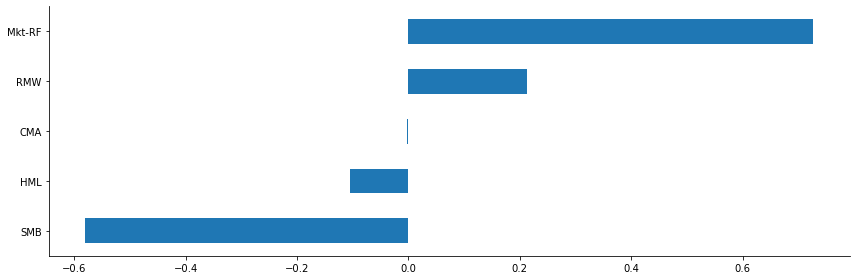

In [ ]:
risks.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout()

In [ ]:
t = risks.mean().div(risks.std())
t

Mkt-RF    0.161429
SMB      -0.090837
HML      -0.022622
RMW       0.044601
CMA      -0.000456
dtype: float64

### 시간에 따른 가치 변화
* 2단계 추정의 결과 값에 대한 이동평균(2년단위) 변화

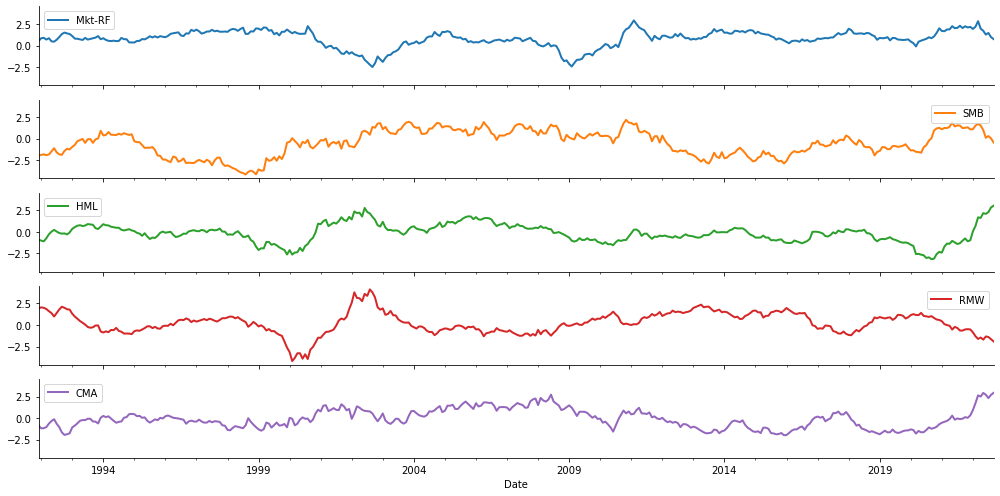

In [ ]:
window = 24  # months
lambdas.rolling(window).mean().dropna().plot(lw=2,
                                             figsize=(14, 7),
                                             subplots=True,
                                             sharey=True)
sns.despine()
plt.tight_layout()

###  추정치 검증
* LinearFactorModel : 2-step으로 직접구현한 결과와 동일한 계수 추정치

In [ ]:
mod = LinearFactorModel(portfolios=ff_portfolio_data, factors=ff_factor_data)
res = mod.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6481
No. Factors:                          5   J-statistic:                    9.0947
No. Observations:                   393   P-value                         0.6948
Date:                  Tue, Nov 15 2022   Distribution:                 chi2(12)
Time:                          21:48:17                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.7267     0.2308     3.1482     0.0016      0.2743      1.1791
SMB           -0.5804     0.3542    

## 17개 산업군별 계수 추정치
* 유의미한 팩터 선정
* <font color=red><b>2000년대 들어서 시장모멘텀(Mkt-RF)이 자산 수익률을 설명하는데 있어서 다른 팩터에 비해 중요한 요소</b>

In [ ]:
print(res.full_summary)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6481
No. Factors:                          5   J-statistic:                    9.0947
No. Observations:                   393   P-value                         0.6948
Date:                  Tue, Nov 15 2022   Distribution:                 chi2(12)
Time:                          21:48:17                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.7267     0.2308     3.1482     0.0016      0.2743      1.1791
SMB           -0.5804     0.3542    

# FF 수익률 
* 시가총액, PBR 별 CAGR

##  Data Load
* 포트폴리오 수익률 데이터
    * 시가총액(ME; Market Equity)과 PBR의 역수(BM; BE/ME; Book Equity/Market Equity)에 따른 수익률 데이터
    * 월단위 10x10(100개) 칼럼
        * <font color=red><b>ME1(소형주) ~ ME10(대형주)
        * <font color=red><b>BM1(고PBR) ~ BM10(저PBR)

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader
import pandas_datareader.data as web
import re

In [2]:
[f for f in pandas_datareader.famafrench.get_available_datasets() if '100_' in f]

['100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '100_Portfolios_ME_OP_10x10',
 '100_Portfolios_10x10_ME_OP_Wout_Div',
 '100_Portfolios_ME_OP_10x10_daily',
 '100_Portfolios_ME_INV_10x10',
 '100_Portfolios_10x10_ME_INV_Wout_Div',
 '100_Portfolios_ME_INV_10x10_daily']

In [3]:
file_name = '100_Portfolios_10x10'
data = web.DataReader(file_name, 'famafrench', start='1960-01', end='2022-10')[0]

## 데이터 전처리

In [4]:
data = data.replace(-99.99, 0)
 
# SMALL:ME1, BIG:ME10, LoBM:BM1, HiBM:BM10 으로 매핑
col_mapping = {'SMALL LoBM': 'ME01 BM01',
               'SMALL HiBM': 'ME1 BM10',
               'BIG LoBM'  : 'ME10 BM1',
               'BIG HiBM'  : 'ME10 BM10'}
data = data.rename(columns=col_mapping)
 
# 정렬의 편의를 위해 칼럼명의 숫자 앞에 0을 붙여줌
data.columns = [re.sub(r'(\d+)', lambda x: x.group().zfill(2), col) for col in data.columns]
data.head()

,ME01 BM01,ME01 BM02,ME01 BM03,ME01 BM04,ME01 BM05,ME01 BM06,ME01 BM07,ME01 BM08,ME01 BM09,ME01 BM10,...,ME10 BM01,ME10 BM02,ME10 BM03,ME10 BM04,ME10 BM05,ME10 BM06,ME10 BM07,ME10 BM08,ME10 BM09,ME10 BM10
Date,,,,,,,,,,,,,,,,,,,,,
1960-01,0.0,-7.7186,-1.2337,-2.3782,0.2491,5.6496,-1.8725,2.0832,-0.7562,1.2094,...,-9.5435,-9.9434,-7.7243,-8.3930,0.4943,-11.1928,-5.8798,-5.7852,-7.0278,-9.6868
1960-02,0.0,-2.4891,-10.1590,0.5316,-2.0339,-0.4518,1.5439,-1.2480,-2.0108,-0.6085,...,1.6079,3.8474,-2.9922,-0.4596,6.4745,-1.4951,-4.8610,1.1168,-5.5727,-2.7913
1960-03,0.0,0.0000,-7.1609,-2.4953,-10.0372,4.7413,-3.3877,1.7007,-1.3662,-2.6052,...,-0.3415,-1.0411,-2.9817,-0.0733,-0.7739,4.3049,-2.9745,-3.0931,-7.5616,-8.0746
1960-04,0.0,-5.3827,-8.7094,-6.5515,-2.5885,-1.9301,-0.4623,-5.1996,-1.5336,-3.5141,...,-1.3250,-1.6597,-5.1374,-0.5307,-1.4618,-4.3821,-0.6052,-4.3452,-3.7482,-3.7090
1960-05,0.0,-6.7140,0.1346,-6.6640,-10.7391,-7.0265,-2.6275,4.9493,1.5946,0.6615,...,5.6661,3.1828,1.5537,2.3032,1.6579,10.8706,-3.7222,-2.7943,-2.0467,0.2852


In [5]:
data.tail()

,ME01 BM01,ME01 BM02,ME01 BM03,ME01 BM04,ME01 BM05,ME01 BM06,ME01 BM07,ME01 BM08,ME01 BM09,ME01 BM10,...,ME10 BM01,ME10 BM02,ME10 BM03,ME10 BM04,ME10 BM05,ME10 BM06,ME10 BM07,ME10 BM08,ME10 BM09,ME10 BM10
Date,,,,,,,,,,,,,,,,,,,,,
2022-05,-9.5557,-4.3523,1.2525,-6.0269,-4.1851,-0.8989,-8.4380,0.9420,1.4032,0.5695,...,-2.7832,-2.9318,-1.9598,3.6719,3.0340,2.4584,8.0532,4.8476,7.0857,6.1703
2022-06,-1.2632,-3.3437,-4.0165,-6.0989,-2.4905,-2.4550,-4.5124,-6.0297,-7.1510,-12.4536,...,-8.3429,-6.8281,-5.2172,-4.9522,-7.6416,-9.6045,-10.1825,-12.4404,-11.6129,-13.7714
2022-07,10.5046,18.1784,9.5380,4.2364,6.5984,13.6733,12.3345,5.4001,3.3613,4.6798,...,14.4813,6.3771,5.1867,1.1011,4.4171,1.6813,4.9660,10.3054,7.4407,5.1984
2022-08,3.9129,7.9774,-3.7143,8.2890,1.0332,-3.1745,5.4648,-0.6175,0.5499,-1.3651,...,-5.6811,-5.1042,-3.0177,-3.4265,1.1877,-4.4031,0.9719,0.0569,-4.3797,-1.7347
2022-09,-9.7764,-15.3147,-12.0254,-16.1765,-8.7720,-10.1044,-8.6971,-12.1253,-7.4561,-11.0688,...,-10.2598,-10.2466,-5.7351,-2.3287,-9.8043,-12.4140,-7.6774,-9.4020,-7.2470,-10.9646


## 누적수익률, 연복리수익률(CAGR)

In [6]:
def get_pf_cagr(data, start_month, end_month):
    data = data[start_month:end_month] 
 
    # 누적 수익률
    df_ret = (data/100+1).cumprod().loc[end_month].reset_index()
    
    # 10x10 matrix
    df_ret.columns = ['factors', 'returns']
    df_ret = pd.concat([df_ret['factors'].str.split(expand=True), df_ret['returns']], axis=1)
    df_ret.columns = ['MarketCap', 'Book_to_Market', 'Returns']
    cum_ret = df_ret.pivot(index="MarketCap", columns="Book_to_Market", values="Returns")
 
    # 연복리수익률(CAGR)
    n_years = data.loc[start_month:end_month].shape[0]/12
    res_cagr = (cum_ret)**(1/n_years)-1
    
    return cum_ret, res_cagr

### 시기에 따른 수익률
* 시기에 따라 수익률이 높은 영역이 다르다
* 소형 가치주 전략이 과거에는 잘 통했을지 몰라도 언제나 통하는 전략은 아니다

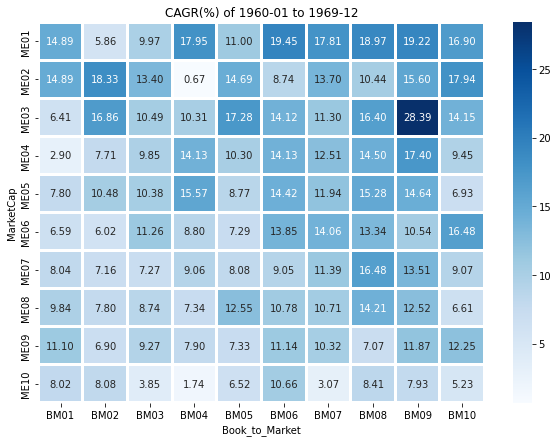

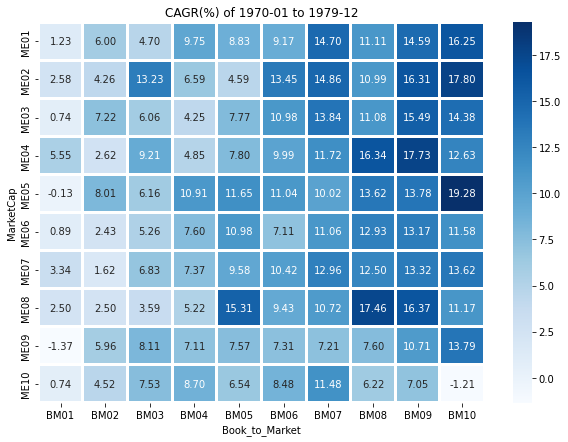

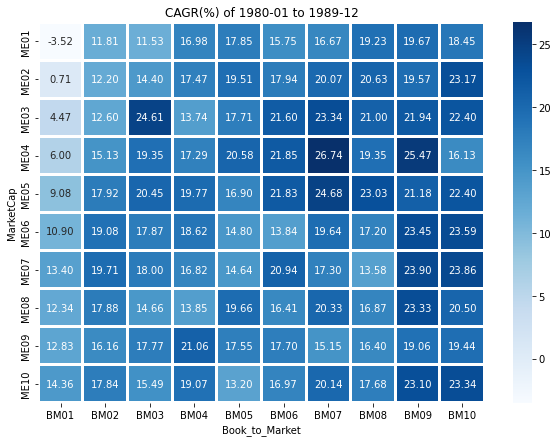

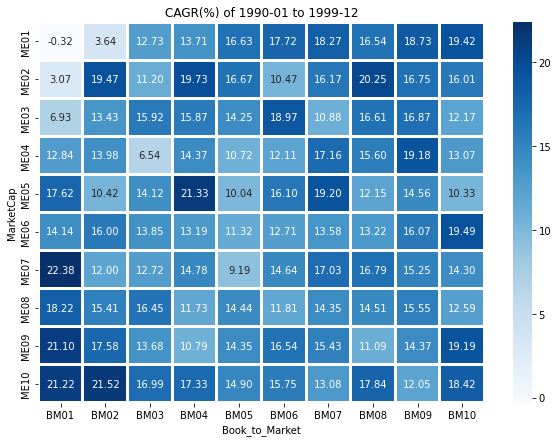

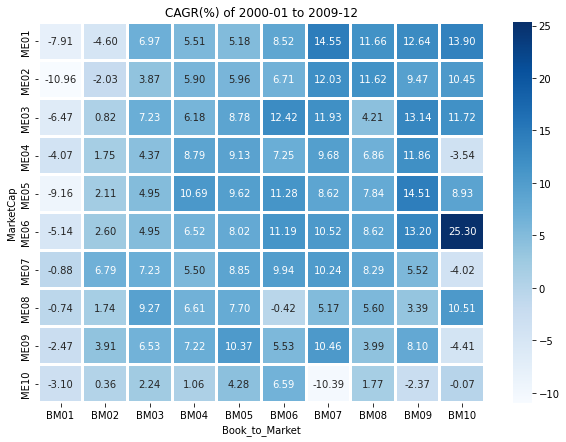

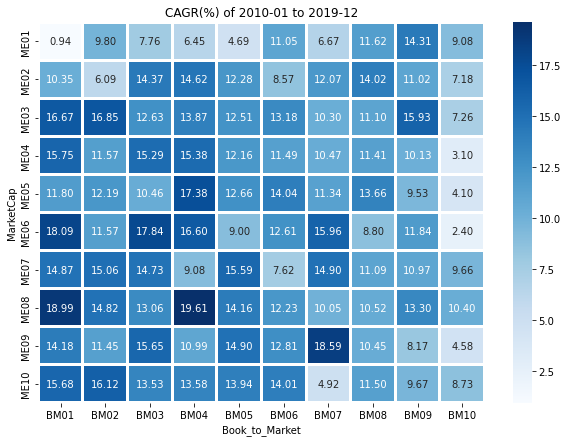

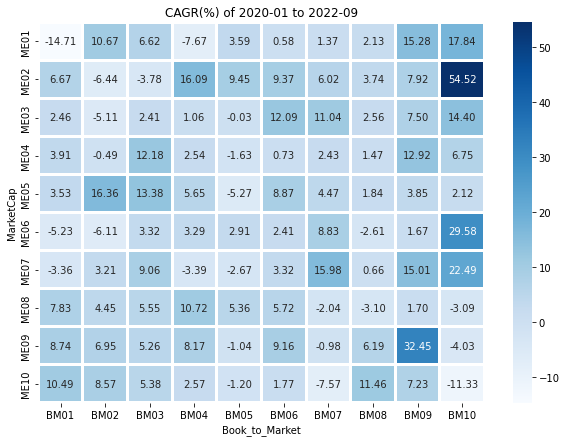

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

date_list =[ ('1960-01','1969-12'), ('1970-01','1979-12'), ('1980-01','1989-12'), ('1990-01','1999-12'), ('2000-01','2009-12'), ('2010-01','2019-12'), ('2020-01','2022-09')]
for val in date_list:
    cum_ret, cagr = get_pf_cagr(data, val[0], val[1])
    fig, ax = plt.subplots(figsize=(10,7))    
    ax = sns.heatmap(cagr*100, cmap="Blues",annot=True,fmt=".2f", linewidths=2)
    ax.set_title(label=f'CAGR(%) of {val[0]} to {val[1]}');

# 백테스트
* 소형주 + 저PBR 전략에 대한 백테스트
* <font color=red><b> 매수전략
    * 소형주(시가총액 하위 20% 주식)만 매수
    * PBR이 가장 낮은 주식 20~30개 매수 (단, PBR < 0.2 주식은 제외)
    * 매도전략: 연 1회 리밸런싱
* 올라떼  : https://www.allatte.com/      
    * 금융 데이터베이스 + COSMOS 투자 솔루션 엔진 기반 백테스트 엔진

<img src="./imgs/img04_1.png" width=1000><br>
<img src="./imgs/img04_2.png" width=1000><br>
<img src="./imgs/img04_3.png" width=1000><br>

* 전략 성과 요약
* 동일 비중 투자 방식으로 계산

## 성과요약
* ./dataset/20221116__시가총액.csv

<table role="table" class="chakra-table css-1mave1d"><thead class="css-0"><tr role="row" class="css-0"><th class="css-xrqmkh"></th><th class="css-m8nct8"><div class="css-dm137e">전략</div></th><th align="center" class="css-99w67r"><div class="css-dm137e"> 한국
코스피 지수</div></th></tr></thead><tbody class="css-1v3e5l7"><tr role="row" class="css-epvm6"><td role="gridcell" class="css-11ynk8p"><p class="chakra-text css-1f4m6lb" style="font-size: 14px; font-family: Pretendard;">누적 수익률</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1yukn3u" style="font-size: 14px; font-family: Pretendard;">74.82%</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1dpjmoo" style="font-size: 14px; font-family: Pretendard;">146.32%</p></td></tr><tr role="row" class="css-epvm6"><td role="gridcell" class="css-11ynk8p"><p class="chakra-text css-1f4m6lb" style="font-size: 14px; font-family: Pretendard;">연율화 수익률</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1yukn3u" style="font-size: 14px; font-family: Pretendard;">3.19%</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1dpjmoo" style="font-size: 14px; font-family: Pretendard;">5.21%</p></td></tr><tr role="row" class="css-epvm6"><td role="gridcell" class="css-11ynk8p"><p class="chakra-text css-1f4m6lb" style="font-size: 14px; font-family: Pretendard;">연율화 변동성</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1yukn3u" style="font-size: 14px; font-family: Pretendard;">22.27%</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1dpjmoo" style="font-size: 14px; font-family: Pretendard;">18.45%</p></td></tr><tr role="row" class="css-epvm6"><td role="gridcell" class="css-11ynk8p"><p class="chakra-text css-1f4m6lb" style="font-size: 14px; font-family: Pretendard;">샤프지수</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1yukn3u" style="font-size: 14px; font-family: Pretendard;">0.14</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1dpjmoo" style="font-size: 14px; font-family: Pretendard;">0.28</p></td></tr><tr role="row" class="css-epvm6"><td role="gridcell" class="css-11ynk8p"><p class="chakra-text css-1f4m6lb" style="font-size: 14px; font-family: Pretendard;">최대 손실 (MDD)</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1yukn3u" style="font-size: 14px; font-family: Pretendard;">-63.35%</p></td><td role="gridcell" class="css-leid03"><p class="chakra-text css-1dpjmoo" style="font-size: 14px; font-family: Pretendard;">-46.98%</p></td></tr></tbody></table>

## 기간별 성과

<table role="table" class="chakra-table css-huur3v"><thead class="css-rw840y"><tr role="row" class="css-0"><th class="css-1zts0j"></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2005-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2006-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2007-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2008-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2009-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2010-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2011-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2012-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2013-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2014-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2015-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2016-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2017-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2018-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2019-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2020-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-11</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2021-12</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-01</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-02</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-03</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-04</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-05</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-06</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-07</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-08</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-09</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-10</p></th><th class="css-1sfgrtz"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2022-11</p></th></tr></thead><tbody class="css-0"><tr role="row" class="css-epvm6"><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">전략</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-6.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-6.77%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.36%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">12.85%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">10.27%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.96%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">15.62%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.44%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">14.66%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.52%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.86%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.52%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.65%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">6.99%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-9.51%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-5.63%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.32%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">6.79%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">6.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.44%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">14.81%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.70%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.31%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.66%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">8.29%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">17.59%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">9.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">18.54%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-6.03%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.44%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-5.60%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-7.36%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-11.89%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.74%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.16%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.67%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">5.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.33%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.03%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-8.28%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.71%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-36.69%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">7.43%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.73%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.31%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">5.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">20.28%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.28%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-5.07%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.60%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">5.28%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.97%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.91%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.84%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">6.45%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.45%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-7.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.54%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.13%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-10.73%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.79%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.62%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">12.94%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.45%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.81%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.54%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-7.94%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.57%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">9.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-8.04%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.33%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.08%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-13.03%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-9.12%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.70%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.51%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">8.06%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.24%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.53%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-7.48%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-12.09%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.50%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.44%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">5.60%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.69%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.86%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.06%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.93%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.48%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.06%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.44%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.27%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.46%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">6.38%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.70%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.24%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.43%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.14%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.00%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.24%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.30%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.01%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">9.59%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.29%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.60%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-6.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.89%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.55%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.75%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.27%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">12.16%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.63%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.17%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.91%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.51%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.21%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-6.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.88%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.72%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.06%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">5.49%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">7.21%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-8.60%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.72%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.31%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.49%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.57%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.37%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.31%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.89%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.87%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.21%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.28%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.82%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.57%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.22%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-7.30%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.54%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.62%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">7.48%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-5.18%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.52%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.30%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-5.53%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.88%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.22%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.15%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-9.73%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.61%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.09%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.33%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.42%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-3.06%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-8.87%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.19%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-5.42%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-10.02%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">7.43%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-4.12%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.67%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.41%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-5.27%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-9.72%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-15.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">6.71%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.30%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.27%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.12%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">7.87%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.47%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.94%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">10.65%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">10.18%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.91%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.32%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.20%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">7.88%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.72%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.00%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.54%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.92%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.72%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-1.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-9.84%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">8.48%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.59%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">3.00%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.13%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-0.67%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-2.27%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-9.44%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">0.01%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">1.54%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">-9.41%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">2.32%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">4.80%</p></td></tr><tr role="row" class="css-0"><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;">한국
코스피 지수</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.64%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -5.77%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 6.17%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 10.73%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.25%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 12.46%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -5.53%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 11.50%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 6.92%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.81%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.77%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.70%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.48%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -7.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.08%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.63%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.49%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.59%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.23%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -5.07%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.10%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.84%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 9.02%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.25%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 10.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.47%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.74%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -7.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -13.88%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.37%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.37%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 7.97%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.05%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -10.08%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -7.43%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.24%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -20.96%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.64%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.05%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -8.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 13.72%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 12.09%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.53%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.16%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 13.39%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.21%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.93%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -5.89%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.00%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 8.36%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -5.19%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.94%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 6.34%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.87%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -5.97%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.04%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.80%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.06%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 7.12%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.01%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.74%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 8.63%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.71%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -6.14%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 8.78%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.13%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.63%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.71%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -12.61%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.85%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 8.45%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.48%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.29%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 7.90%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.98%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.21%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.84%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -7.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.12%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.19%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.69%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.63%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.80%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.22%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.85%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.72%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.91%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.25%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -7.34%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.36%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.51%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.64%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.30%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.00%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.98%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.30%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.18%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.12%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.08%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.81%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.24%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.50%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.58%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.46%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.30%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.80%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.39%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.63%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.31%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.55%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.12%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.16%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.71%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.68%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.37%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.07%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -1.58%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.44%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.09%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.79%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.27%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.64%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.21%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.01%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.14%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.24%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.61%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.65%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.26%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.73%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.92%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.34%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 6.08%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.33%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.91%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.01%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.59%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.47%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.49%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.16%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.66%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -6.16%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.56%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.84%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.91%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.62%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.74%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.88%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.15%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -12.15%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.78%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.45%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 9.13%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.73%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.58%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.05%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -7.38%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.16%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.02%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.62%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.83%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 6.14%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.15%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -5.80%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -11.64%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 9.01%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.94%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 4.39%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 6.87%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.61%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.75%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.53%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 14.74%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 12.50%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 3.92%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.32%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.25%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.76%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.31%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 2.55%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.97%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -4.40%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.20%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -3.92%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.61%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -9.19%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 0.99%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 1.13%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -2.88%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.15%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -13.35%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 5.24%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -0.11%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> -12.88%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 6.48%</p></td><td role="gridcell" class="css-xumdn4"><p class="chakra-text css-22qzjk" style="font-size: 14px; font-family: Pretendard;"> 7.59%</p></td></tr></tbody></table>

## 누적 수익률

<img src="./imgs/img04_4.png" width=1000>

# S&P500 주가 수익률 예측
* 재무정보 배제 : 횡단 분석 시 선견편향(look-ahead bias)에 대한 검증 필요
* 가격과 거래량 정보로만 데이터 구성

In [ ]:
# url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
# !curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
# url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
# !curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
 
# # install yfinance
# !pip install yfinance --upgrade --no-cache-dir
 
# import packages
%matplotlib inline
 
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from scipy.stats import pearsonr, spearmanr
from talib import MFI, RSI, BBANDS, MACD
import yfinance as yf

import warnings 
warnings.filterwarnings('ignore')

## S&P500 Data Load

In [ ]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies' 
sp500_constituents = pd.read_html(sp_url, header=0)[0] 
sp500_constituents.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   SEC filings            503 non-null    object
 3   GICS Sector            503 non-null    object
 4   GICS Sub-Industry      503 non-null    object
 5   Headquarters Location  503 non-null    object
 6   Date first added       458 non-null    object
 7   CIK                    503 non-null    int64 
 8   Founded                503 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.5+ KB


In [ ]:
sp500_constituents.tail()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873
502,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952


In [ ]:
tickers = ' '.join(sp500_constituents.Symbol.tolist()).replace('.', '-')
prices = yf.download(tickers=tickers, 
                     start='1990-01-01', end='2022-10-31',
                     interval='1d',
                     auto_adjust=False # True: adjust all OHLC automatically
                     )

[*********************100%***********************]  503 of 503 completed

9 Failed downloads:
- FE: No data found for this date range, symbol may be delisted
- HAL: No data found for this date range, symbol may be delisted
- BSX: No data found for this date range, symbol may be delisted
- BAX: No data found for this date range, symbol may be delisted
- CVS: No data found for this date range, symbol may be delisted
- CTSH: No data found for this date range, symbol may be delisted
- TEL: No data found for this date range, symbol may be delisted
- IT: No data found for this date range, symbol may be delisted
- NTRS: No data found for this date range, symbol may be delisted


In [ ]:
prices = prices.dropna(how='all')
prices.head()

Adj Close                                               \
                            A AAL AAP      AAPL ABBV ABC    ABMD       ABT   
Date                                                                         
1990-01-02 00:00:00       NaN NaN NaN  0.264886  NaN NaN  5.8750  1.863649   
1990-01-03 00:00:00       NaN NaN NaN  0.266664  NaN NaN  5.8125  1.870376   
1990-01-04 00:00:00       NaN NaN NaN  0.267553  NaN NaN  5.6250  1.867013   
1990-01-05 00:00:00       NaN NaN NaN  0.268442  NaN NaN  5.7500  1.846829   
1990-01-08 00:00:00       NaN NaN NaN  0.270220  NaN NaN  5.7500  1.856297   

                              ... Volume                                      \
                    ACGL ACN  ...   WYNN     XEL      XOM   XRAY XYL YUM ZBH   
Date                          ...                                              
1990-01-02 00:00:00  NaN NaN  ...    NaN  247200  5326000  18000 NaN NaN NaN   
1990-01-03 00:00:00  NaN NaN  ...    NaN  126800  4980400  79200 NaN NaN NaN   
1990-01-04 00:00:00  NaN NaN  ...    NaN  204200  6013200  25200 NaN NaN NaN   
1990-01-05 00:00:00  NaN NaN  ...    NaN  144800  3854800  92400 NaN NaN NaN   
1990-01-08 00:00:00  NaN NaN  ...    NaN  189000  4302000  98400 NaN NaN NaN   

                                      
                    ZBRA    ZION ZTS  
Date                                  
1990-01-02 00:00:00  NaN   53600 NaN  
1990-01-03 00:00:00  NaN  111200 NaN  
1990-01-04 00:00:00  NaN    1600 NaN  
1990-01-05 00:00:00  NaN       0 NaN  
1990-01-08 00:00:00  NaN    1600 NaN  

[5 rows x 3018 columns]

In [ ]:
prices = prices.stack().swaplevel().sort_index()
prices.columns = [col.lower().replace(' ', '_') for col in prices.columns]
prices.index.names = ['ticker', 'date']
prices.head()

adj_close      close       high        low  \
ticker date                                                              
A      1999-11-18 00:00:00  26.929766  31.473534  35.765381  28.612303   
       1999-11-19 00:00:00  24.711121  28.880545  30.758226  28.478184   
       1999-11-22 00:00:00  26.929766  31.473534  31.473534  28.657009   
       1999-11-23 00:00:00  24.481606  28.612303  31.205294  28.612303   
       1999-11-24 00:00:00  25.131895  29.372318  29.998213  28.612303   

                                 open      volume  
ticker date                                        
A      1999-11-18 00:00:00  32.546494  62546380.0  
       1999-11-19 00:00:00  30.713518  15234146.0  
       1999-11-22 00:00:00  29.551144   6577870.0  
       1999-11-23 00:00:00  30.400572   5975611.0  
       1999-11-24 00:00:00  28.701717   4843231.0

In [ ]:
# prices.to_parquet('sp500_prices_20171201_20211203.parquet')
prices.to_csv('./sp500_prices_20171201_20211203.parquet.csv')

# 기술적 지표 계산
* TA-Lib : ADX, MACD, RSI, 스토캐스틱(Stochastic), 볼린저 밴드(Bollinger Bands) 등 150개 이상의 지표 계산

## 달러거래량
* 달러 거래량의 21일 이평선 : 종목의 거래규모 추세 파악 -->  투자 유니버스(종목) 결정

In [ ]:
# 달러 거래량
prices['dollar_vol'] = prices[['close', 'volume']].prod(axis=1)

# 달러 거래량 21이평
prices['dollar_vol_1m'] = (prices.dollar_vol.groupby('ticker')
                           .rolling(window=21)  #, level='date') 
                           .mean()).values

# 달러 거래량 21일 이평 랭킹
prices['dollar_vol_rank'] = (prices.groupby('date')
                             .dollar_vol_1m
                             .rank(ascending=False))

In [ ]:
from talib import MFI, RSI, BBANDS, MACD

## MFI

In [ ]:
prices['mfi'] = prices.groupby(level='ticker').apply(lambda x: MFI(x['high'], 
                                                                   x['low'], 
                                                                   x['close'], 
                                                                   x['volume'])).droplevel(0)

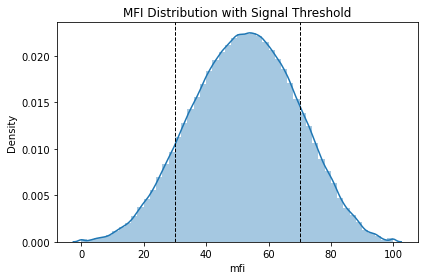

In [ ]:
ax = sns.distplot(prices.mfi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('MFI Distribution with Signal Threshold')
plt.tight_layout();

## RSI

In [ ]:
prices['rsi'] = prices.groupby(level='ticker').close.apply(RSI)

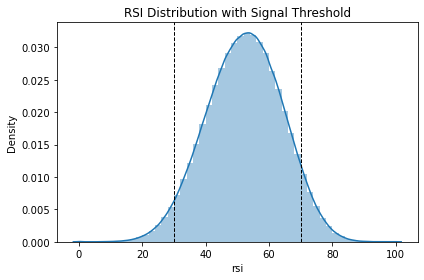

In [ ]:
ax = sns.distplot(prices.rsi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('RSI Distribution with Signal Threshold')
plt.tight_layout();

## Bollinger Bands

In [ ]:
def compute_bb(close):
    high, mid, low = BBANDS(close, timeperiod=20)
    return pd.DataFrame({'bb_high': high, 'bb_low': low}, index=close.index)
 
prices = (prices.join(prices
                      .groupby(level='ticker')
                      .close
                      .apply(compute_bb)))
prices['bb_high'] = prices.bb_high.sub(prices.close).div(prices.bb_high).apply(np.log1p)
prices['bb_low'] = prices.close.sub(prices.bb_low).div(prices.close).apply(np.log1p)
 

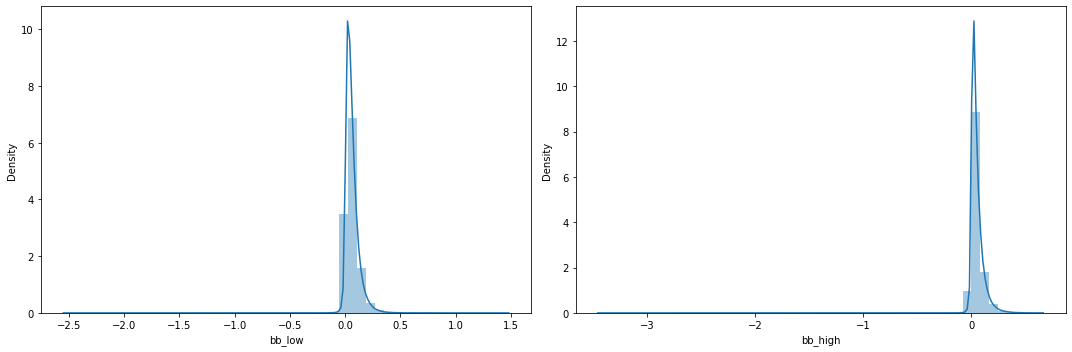

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(prices.loc[:, 'bb_low'].dropna(), ax=axes[0])
sns.distplot(prices.loc[:, 'bb_high'].dropna(), ax=axes[1])
plt.tight_layout();

## MACD

In [ ]:
def compute_macd(close):
    macd = MACD(close)[0]
    return (macd - np.mean(macd))/np.std(macd)
 
prices['macd'] = (prices
                  .groupby('ticker', group_keys=False)
                  .close
                  .apply(compute_macd))

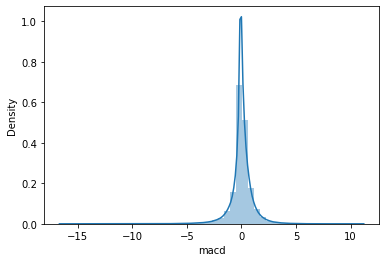

In [ ]:
sns.distplot(prices.macd.dropna());

##  lag 수익률(Lagged Returns)
* t 영업일 전 시점에서 계산된 최근 n 영업일 주가수익률
    * (1) 최근 n 영업일의 주가수익률 계산
    * (2) 극단적인 수익률 값 제거
    * (3) 수익률 일할 계산(기하평균)
    * (4) 수익률 변수를 lag(t 영업일) 만큼 현재 시점으로 shift

In [ ]:
ndays = [1, 5, 10, 21, 42, 63]
q = 0.0001
for n in ndays:
    prices[f'return_{n}d'] = (prices.groupby(level='ticker').close
                                .pct_change(n)
                                .pipe(lambda x: x.clip(lower=x.quantile(q),
                                                       upper=x.quantile(1 - q)))
                                .add(1).pow(1/n).sub(1)
                                )

In [ ]:
prices.loc[prices.index.get_level_values('ticker').isin(['AAPL']), 
           ['close']+[col for col in prices.columns if 'return_' in col]].tail()

close  return_1d  return_5d  return_10d  \
ticker date                                                                
AAPL   2022-10-24 00:00:00  149.449997   0.014803   0.009697    0.006252   
       2022-10-25 00:00:00  152.339996   0.019338   0.011675    0.009221   
       2022-10-26 00:00:00  149.350006  -0.019627   0.007519    0.007687   
       2022-10-27 00:00:00  144.800003  -0.030465   0.001959    0.001259   
       2022-10-28 00:00:00  155.740005   0.075553   0.011247    0.011889   

                            return_21d  return_42d  return_63d  \
ticker date                                                      
AAPL   2022-10-24 00:00:00   -0.000311   -0.002715   -0.000227   
       2022-10-25 00:00:00    0.000493   -0.002612   -0.000457   
       2022-10-26 00:00:00   -0.000762   -0.002170   -0.000828   
       2022-10-27 00:00:00   -0.001628   -0.002578   -0.001830   
       2022-10-28 00:00:00    0.004246   -0.000480   -0.000577   

                            return_1d_lag1  return_5d_lag1  return_10d_lag1  \
ticker date                                                                   
AAPL   2022-10-24 00:00:00        0.027059        0.012531         0.005011   
       2022-10-25 00:00:00        0.014803        0.009697         0.006252   
       2022-10-26 00:00:00        0.019338        0.011675         0.009221   
       2022-10-27 00:00:00       -0.019627        0.007519         0.007687   
       2022-10-28 00:00:00       -0.030465        0.001959         0.001259   

                            ...  return_10d_lag4  return_21d_lag4  \
ticker date                 ...                                     
AAPL   2022-10-24 00:00:00  ...        -0.001620        -0.003422   
       2022-10-25 00:00:00  ...        -0.001749        -0.004123   
       2022-10-26 00:00:00  ...        -0.001412        -0.003307   
       2022-10-27 00:00:00  ...         0.005011        -0.001735   
       2022-10-28 00:00:00  ...         0.006252        -0.000311   

                            return_42d_lag4  return_63d_lag4  return_1d_lag5  \
ticker date                                                                    
AAPL   2022-10-24 00:00:00        -0.004557        -0.000994        0.029123   
       2022-10-25 00:00:00        -0.004178        -0.001219        0.009409   
       2022-10-26 00:00:00        -0.003703        -0.001142        0.000765   
       2022-10-27 00:00:00        -0.003022        -0.000601       -0.003267   
       2022-10-28 00:00:00        -0.002715        -0.000227        0.027059   

                            return_5d_lag5  return_10d_lag5  return_21d_lag5  \
ticker date                                                                    
AAPL   2022-10-24 00:00:00        0.002818        -0.000028        -0.002691   
       2022-10-25 00:00:00        0.006772        -0.001620        -0.003422   
       2022-10-26 00:00:00        0.007856        -0.001749        -0.004123   
       2022-10-27 00:00:00        0.000559        -0.001412        -0.003307   
       2022-10-28 00:00:00        0.012531         0.005011        -0.001735   

                            return_42d_lag5  return_63d_lag5  
ticker date                                                   
AAPL   2022-10-24 00:00:00        -0.004834        -0.000929  
       2022-10-25 00:00:00        -0.004557        -0.000994  
       2022-10-26 00:00:00        -0.004178        -0.001219  
       2022-10-27 00:00:00        -0.003703        -0.001142  
       2022-10-28 00:00:00        -0.003022        -0.000601  

[5 rows x 37 columns]

In [ ]:
lags = [1, 2, 3, 4, 5]
for lag in lags:
    for n in ndays:
        prices[f'return_{n}d_lag{lag}'] = (prices.groupby(level='ticker')[f'return_{n}d'].shift(lag))


In [ ]:
prices.loc[prices.index.get_level_values('ticker').isin(['AAPL']), 
           ['close']+[col for col in prices.columns if '_lag' in col]].tail()

close  return_1d_lag1  return_5d_lag1  \
ticker date                                                              
AAPL   2022-10-24 00:00:00  149.449997        0.027059        0.012531   
       2022-10-25 00:00:00  152.339996        0.014803        0.009697   
       2022-10-26 00:00:00  149.350006        0.019338        0.011675   
       2022-10-27 00:00:00  144.800003       -0.019627        0.007519   
       2022-10-28 00:00:00  155.740005       -0.030465        0.001959   

                            return_10d_lag1  return_21d_lag1  return_42d_lag1  \
ticker date                                                                     
AAPL   2022-10-24 00:00:00         0.005011        -0.001735        -0.003022   
       2022-10-25 00:00:00         0.006252        -0.000311        -0.002715   
       2022-10-26 00:00:00         0.009221         0.000493        -0.002612   
       2022-10-27 00:00:00         0.007687        -0.000762        -0.002170   
       2022-10-28 00:00:00         0.001259        -0.001628        -0.002578   

                            return_63d_lag1  return_1d_lag2  return_5d_lag2  \
ticker date                                                                   
AAPL   2022-10-24 00:00:00        -0.000601       -0.003267        0.000559   
       2022-10-25 00:00:00        -0.000227        0.027059        0.012531   
       2022-10-26 00:00:00        -0.000457        0.014803        0.009697   
       2022-10-27 00:00:00        -0.000828        0.019338        0.011675   
       2022-10-28 00:00:00        -0.001830       -0.019627        0.007519   

                            return_10d_lag2  ...  return_10d_lag4  \
ticker date                                  ...                    
AAPL   2022-10-24 00:00:00        -0.001412  ...        -0.001620   
       2022-10-25 00:00:00         0.005011  ...        -0.001749   
       2022-10-26 00:00:00         0.006252  ...        -0.001412   
       2022-10-27 00:00:00         0.009221  ...         0.005011   
       2022-10-28 00:00:00         0.007687  ...         0.006252   

                            return_21d_lag4  return_42d_lag4  return_63d_lag4  \
ticker date                                                                     
AAPL   2022-10-24 00:00:00        -0.003422        -0.004557        -0.000994   
       2022-10-25 00:00:00        -0.004123        -0.004178        -0.001219   
       2022-10-26 00:00:00        -0.003307        -0.003703        -0.001142   
       2022-10-27 00:00:00        -0.001735        -0.003022        -0.000601   
       2022-10-28 00:00:00        -0.000311        -0.002715        -0.000227   

                            return_1d_lag5  return_5d_lag5  return_10d_lag5  \
ticker date                                                                   
AAPL   2022-10-24 00:00:00        0.029123        0.002818        -0.000028   
       2022-10-25 00:00:00        0.009409        0.006772        -0.001620   
       2022-10-26 00:00:00        0.000765        0.007856        -0.001749   
       2022-10-27 00:00:00       -0.003267        0.000559        -0.001412   
       2022-10-28 00:00:00        0.027059        0.012531         0.005011   

                            return_21d_lag5  return_42d_lag5  return_63d_lag5  
ticker date                                                                    
AAPL   2022-10-24 00:00:00        -0.002691        -0.004834        -0.000929  
       2022-10-25 00:00:00        -0.003422        -0.004557        -0.000994  
       2022-10-26 00:00:00        -0.004123        -0.004178        -0.001219  
       2022-10-27 00:00:00        -0.003307        -0.003703        -0.001142  
       2022-10-28 00:00:00        -0.001735        -0.003022        -0.000601  

[5 rows x 31 columns]

# 섹터, 시간 더미변수 생성

In [ ]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies' 
sp500_constituents = pd.read_html(sp_url, header=0)[0] 
sector = sp500_constituents[['Symbol', 'GICS Sector']]
 
sector['GICS Sector'].value_counts()

Information Technology    75
Industrials               71
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Real Estate               31
Utilities                 30
Materials                 28
Communication Services    25
Energy                    23
Name: GICS Sector, dtype: int64

In [ ]:
sector

,sector
ticker,
MMM,Industrials
AOS,Industrials
ABT,Health Care
ABBV,Health Care
ABMD,Health Care
...,...
YUM,Consumer Discretionary
ZBRA,Information Technology
ZBH,Health Care


In [ ]:
# sector.columns = ['ticker', 'sector']
# sector = sector.set_index('ticker')
prices = prices.join(sector)
prices = prices.assign(sector = prices.sector.str.replace(' ', '_'))
prices.head()

ValueError: columns overlap but no suffix specified: Index(['sector'], dtype='object')

In [ ]:
prices['year'] = prices.index.get_level_values('date').year
prices['month'] = prices.index.get_level_values('date').month
 
prices = pd.get_dummies(prices,
                        columns=['year', 'month', 'sector'],
                        prefix=['year', 'month', ''],
                        prefix_sep=['_', '_', ''],
                        drop_first=True)

# 타겟변수 생성
*  특정시점에서 t 영업일 후의 수익률(Forward Returns)

In [ ]:
for t in [1, 5, 10, 21]:
    prices[f'target_{t}d'] = prices.groupby(level='ticker')[f'return_{t}d'].shift(-t)
prices[['close', 'return_1d', 'return_1d_lag1', 'target_1d']].head()

close  return_1d  return_1d_lag1  target_1d
ticker date                                                                
A      1999-11-18 00:00:00  31.473534        NaN             NaN  -0.082386
       1999-11-19 00:00:00  28.880545  -0.082386             NaN   0.089783
       1999-11-22 00:00:00  31.473534   0.089783       -0.082386  -0.090909
       1999-11-23 00:00:00  28.612303  -0.090909        0.089783   0.026563
       1999-11-24 00:00:00  29.372318   0.026563       -0.090909   0.003044

In [ ]:
# prices.to_parquet('sp500_modeling_data.parquet')
prices.to_csv('./sp500_modeling_data.parquet_vv.csv')